## Data Science Major Project System.

### Online Retail Recommendation System

如果您尝试过在线购物，您一定已经注意到，当您在电子商务网站上查看产品时，会看到一个建议产品列表。在此项目中，您将开发一个推荐系统。

为此，我们附加了一个包含在线零售数据推荐系统信息的数据集，以便我们了解可以推荐什么类型的产品。

我们提供来自 Kaggle 的数据集，其中包含有关在线零售数据的历史信息，可用于检测强烈推荐的产品。以下是我们在此使用的数据集中的所有列


Invoice Number: 这是标识交易的号码。

Stock Code: 这是指产品ID。

Description: 描述用户购买的产品。

Quantity: 指定购买商品的数量。

Invoice Date: 交易发生的日期。

Unit Price: 一种产品的价格。

Customer ID: 识别客户。

Country: 进行交易的国家/地区。

Language Used: Python

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install mlxtend
# Mlxtend 代表机器学习扩展。 
# 它是一个第三方 Python 库，其中包含许多用于机器学习和数据科学任务的实用程序和工具， 
# 包括特征选择、集成方法、可视化和模型评估

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

### 1. Data Preprocessing

In [4]:
df = pd.read_csv(r"data.csv",encoding='latin1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2. Exploratory Data Analysis (EDA)

In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Handle Null Values

In [11]:
# Deleting features we dont need.

df.drop(columns=['CustomerID'], axis=1, inplace=True)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [13]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [14]:
# We have enough data so we can delete them. We could fill them with mean, mode etc. It depends on our strategy

df.dropna(subset='Description',axis=0, inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ MB


### Handling Outliers

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,540455.0,9.603129,218.007598,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,540455.0,4.623519,96.889628,-11062.06,1.25,2.08,4.13,38970.0


看数量和单价有负值，先检查处理,"C"代表交易订单取消的

In [19]:
inv = df["InvoiceNo"].str.contains("C",na=False).sum()
print(f"The number of INVOICES containing 'C' : {inv}")

The number of INVOICES containing 'C' : 9288


In [20]:
def cancelledInvoice(x):##把存有字符C的数据删除
    if ('C' in str(x)):
        return np.nan
    else:
        return x

In [21]:
# Deleting datas that includes C in Invoice. Because if it includes 'C'
df ['InvoiceNo'] = df['InvoiceNo'].apply(lambda x:cancelledInvoice(x))

In [22]:
df.dropna(subset='InvoiceNo', axis=0, inplace=True)##剔除交易取消的单子

In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [24]:
def cleanInvoice (x):
    if(str(x).isdigit()!=True or len(str(x)) !=6):
        return np.nan
    else:
        return x

In [25]:
# Invoice data cant be 6 digit and it must be numeric. 

df['InvoiceNo']=df['InvoiceNo'].apply(lambda x: cleanInvoice(x))##订单号不是6为数字的单子去除

In [26]:
df.isnull().sum()

InvoiceNo      3
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [27]:
df.dropna(subset='InvoiceNo',axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531164 entries, 0 to 531163
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531164 non-null  object 
 1   StockCode    531164 non-null  object 
 2   Description  531164 non-null  object 
 3   Quantity     531164 non-null  int64  
 4   InvoiceDate  531164 non-null  object 
 5   UnitPrice    531164 non-null  float64
 6   Country      531164 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.4+ MB


In [29]:
df["InvoiceNo"] = df["InvoiceNo"].astype('int64').astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531164 entries, 0 to 531163
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531164 non-null  object 
 1   StockCode    531164 non-null  object 
 2   Description  531164 non-null  object 
 3   Quantity     531164 non-null  int64  
 4   InvoiceDate  531164 non-null  object 
 5   UnitPrice    531164 non-null  float64
 6   Country      531164 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.4+ MB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,531164.0,10.293676,159.301807,-9600.0,1.00,3.00,10.00,80995.00
UnitPrice,531164.0,3.879001,32.514222,0.0,1.25,2.08,4.13,13541.33


In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [33]:
##统计错误商品数量的单子
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()
print(f"The number of negative QUANTITY values: {qtt}")

The number of negative QUANTITY values: 474


In [34]:
##统计错误商品单价的单子
up=df.loc[df["UnitPrice"]<0,"UnitPrice"].count()
up

0

In [35]:
# Eliminate Quantity data that are less then 0 
## 只需要商品数量>0的单子
df=df[(df['Quantity'] > 0)]

In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [38]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
530685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France
530686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France
530687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France
530688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France


In [39]:
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()
print(f"The number of negative QUANTITY values: {qtt}")

The number of negative QUANTITY values: 0


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530690.0,10.605873,156.638294,1.0,1.00,3.00,10.00,80995.00
UnitPrice,530690.0,3.882466,32.528533,0.0,1.25,2.08,4.13,13541.33


负价格处理完毕

其次，让我们使用分位数范围处理异常值

### INTERQUARTILE RANGE

What is interquantile range?
什么是四分位数间距？

In descriptive statistics, the interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data
在描述性统计中，四分位距 (IQR) 是统计离散度的度量，即数据的分布。 IQR 也可称为中间价差、中间 50%、第四价差或 H 价差。它被定义为数据的第 75 个百分位数和第 25 个百分位数之间的差异

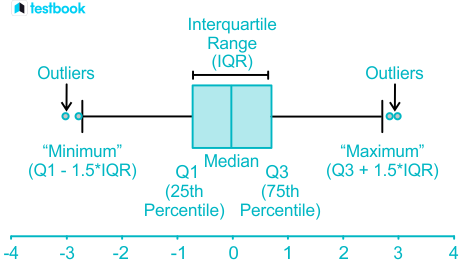.

In [41]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [42]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country'],
      dtype='object')

<Axes: >

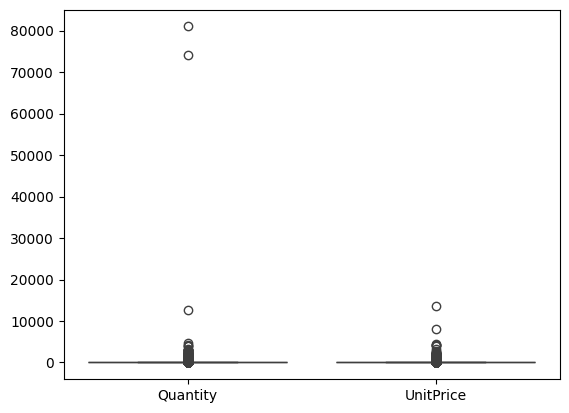

In [43]:
# We can see is there outliers in our dataset by using boxplot.

sns.boxplot(df[['Quantity','UnitPrice']])

In [44]:
def handling_outlier(df,variable):
    quartile1 = df[variable].quantile(0.01) 
    quartile3 = df[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    df.loc[df[variable] < low_limit, variable] = low_limit
    df.loc[df[variable] > up_limit, variable] = up_limit

In [45]:
handling_outlier(df,"Quantity")
handling_outlier(df,"UnitPrice")

In [46]:
df.reset_index(drop=True, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
530685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,France
530686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,France
530687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,France
530688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,France


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530690.0,9.566813,21.585708,1.0,1.00,3.00,10.00,248.500
UnitPrice,530690.0,3.335458,3.926555,0.0,1.25,2.08,4.13,42.015


##### they look good

In [48]:
# Selecting some countries from the data set
list_cntry = ["Greece","Singapore","Netherlands","Switzerland","Cyprus","France","Korea","Canada"]
for number,country in enumerate(list_cntry):
    list_cntry[number] = df[df['Country'] == country]

In [49]:
del df
df = pd.concat(list_cntry,axis=0)
df = df.sort_index()

In [50]:
df = df.reset_index(drop=True)
df.shape

(13870, 7)

In [51]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,12/1/2010 8:45,3.75,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,12/1/2010 8:45,3.75,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,12/1/2010 8:45,3.75,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,12/1/2010 8:45,0.85,France
4,536370,21883,STARS GIFT TAPE,24.0,12/1/2010 8:45,0.65,France
...,...,...,...,...,...,...,...
13865,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,France
13866,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,France
13867,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,France
13868,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,France


### 2.1 Data Analysis & Visualization数据分析与可视化

In [52]:
# Top 10 best selling products

product_count = df.groupby("Description")["Quantity"].sum().nlargest(10)
product_count=product_count.reset_index()

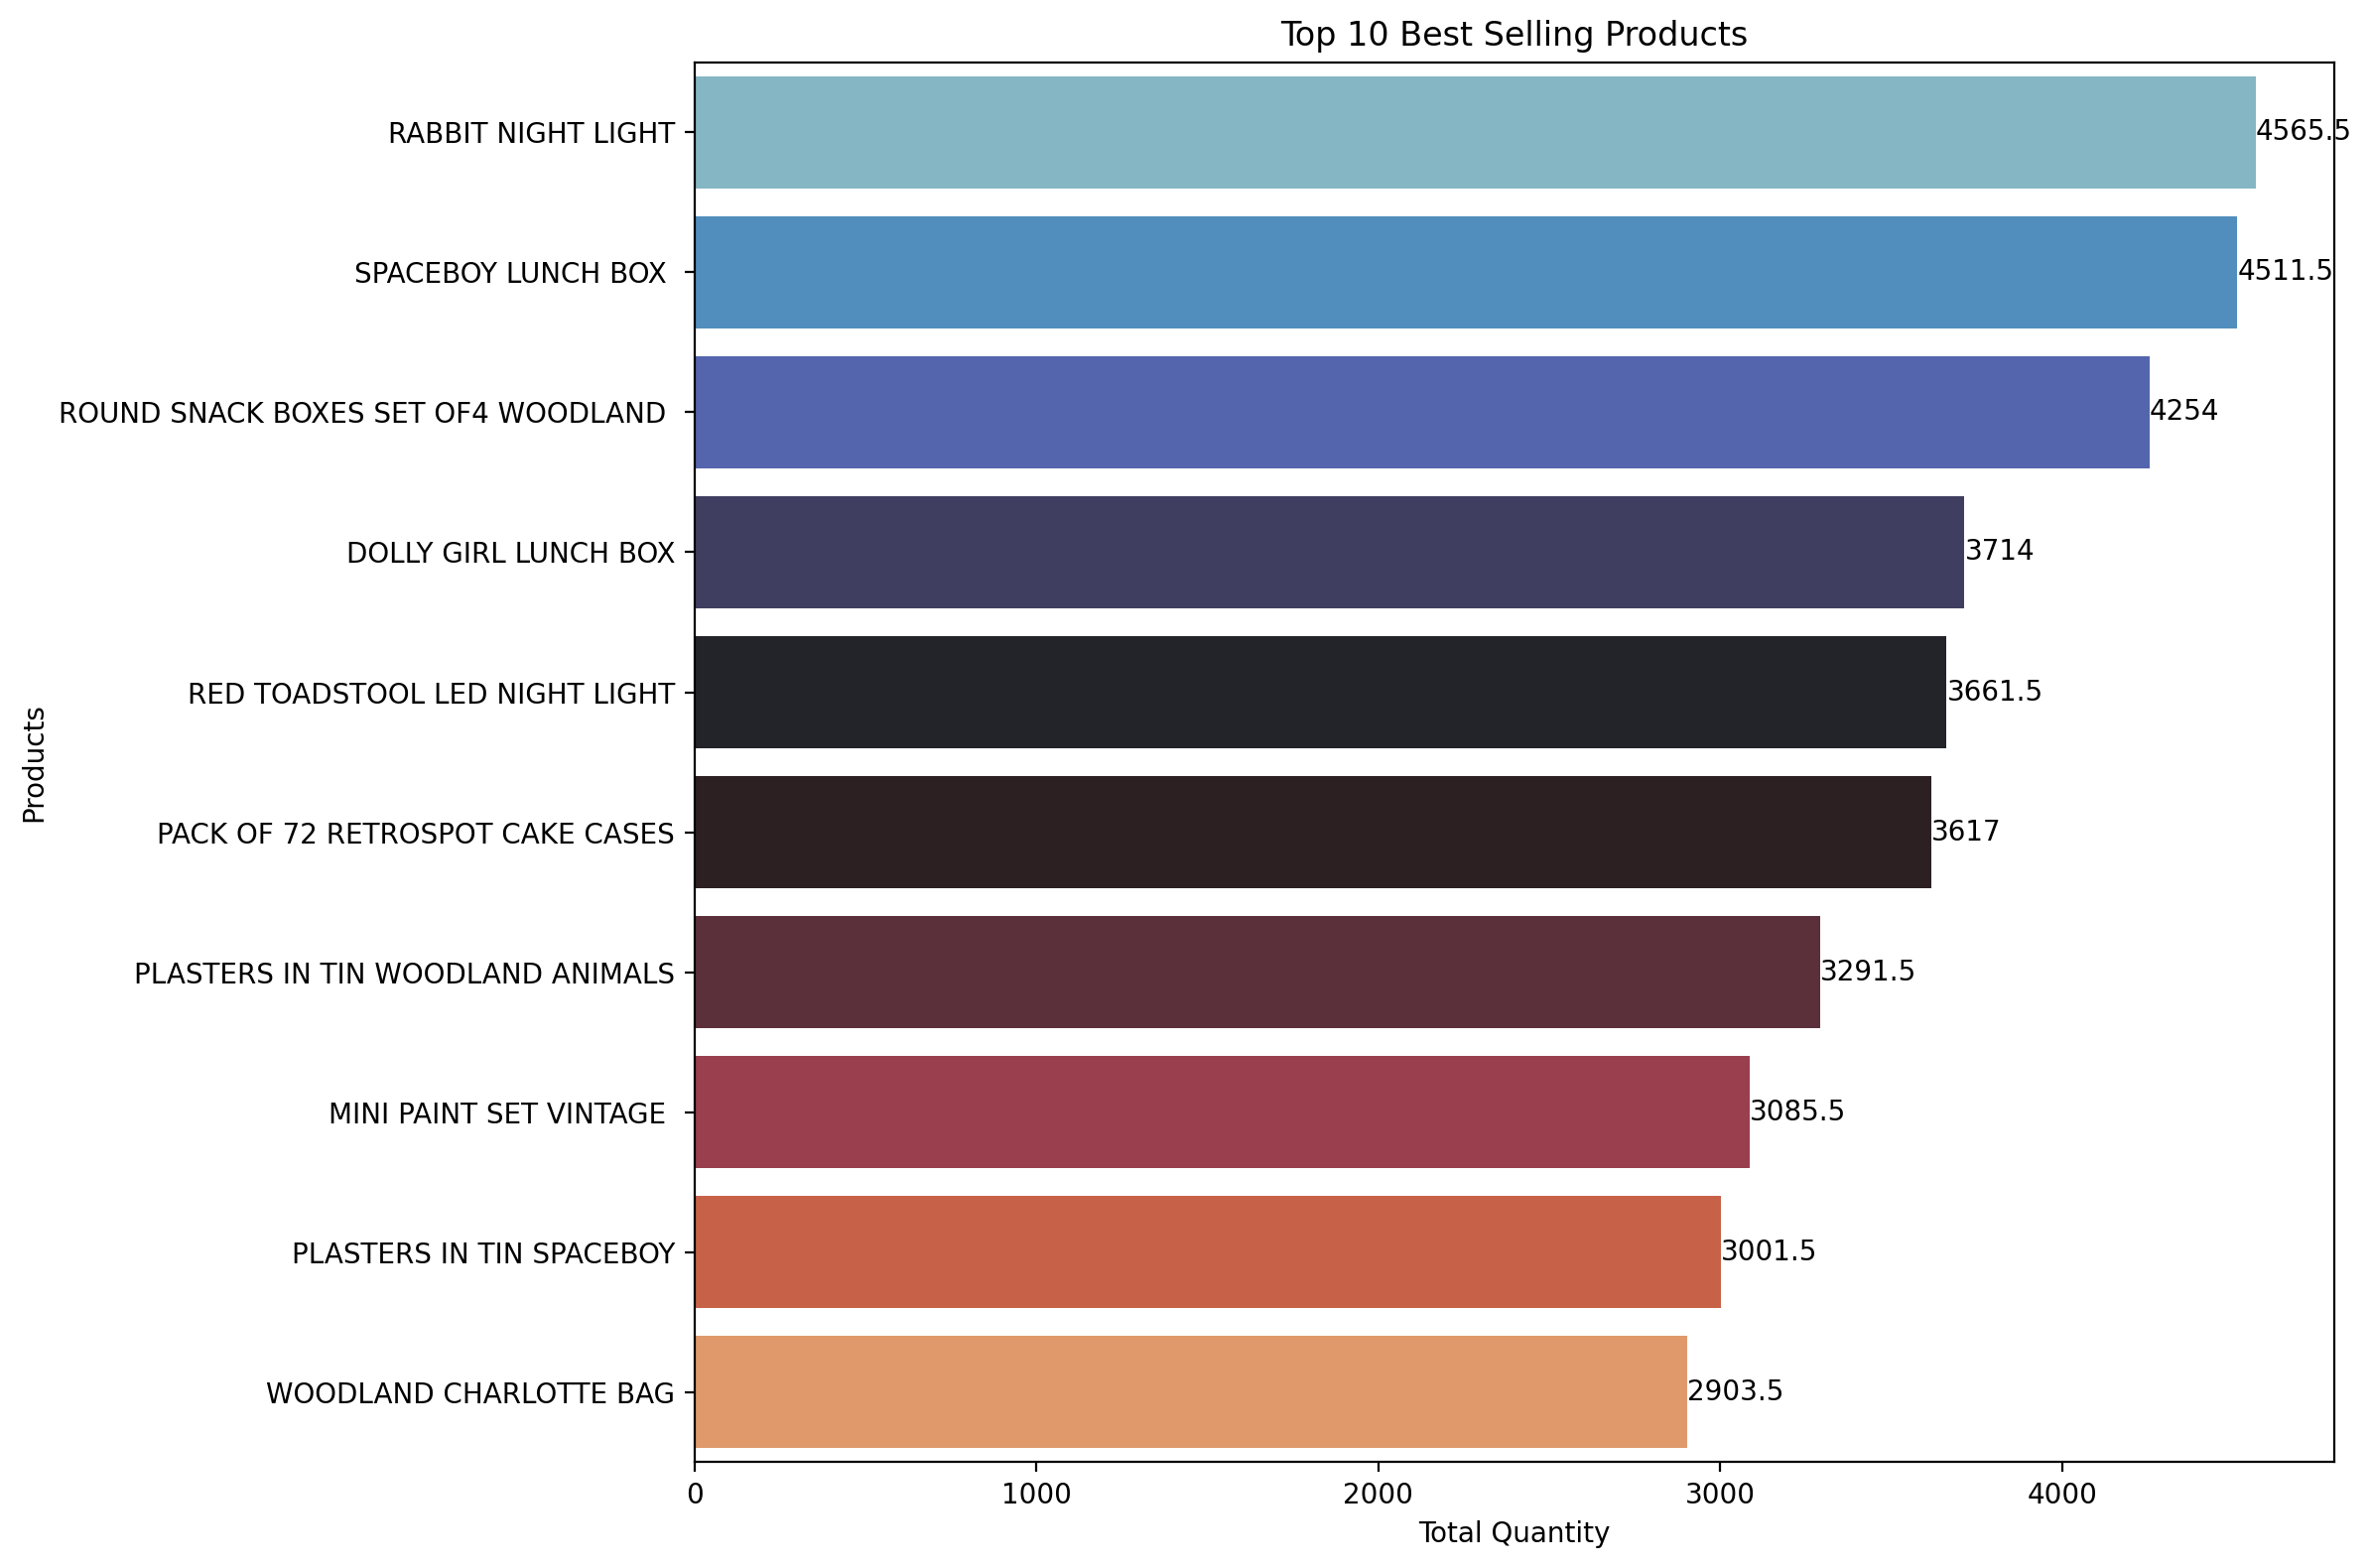

In [53]:
plt.figure(dpi= 200 ,figsize=(12, 8))

ax = sns.barplot(data=product_count,y="Description",x="Quantity",palette="icefire")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity")
plt.ylabel("Products")
plt.tight_layout()
plt.show()

In [54]:
# Price of any product by country

list_country, list_price = [], []
for col in df["Country"].unique():
    price = df.loc[(df["Country"] == col) & (df["Description"] == "WHITE HANGING HEART T-LIGHT HOLDER"), "UnitPrice"].mean()

    list_country.append(col)
    list_price.append(round(price,3))

df_price = pd.DataFrame(columns=["Country"],data=list_price,index=list_country)
df_price.dropna(inplace=True)
df_price = df_price.sort_values(by="Country",ascending=False)

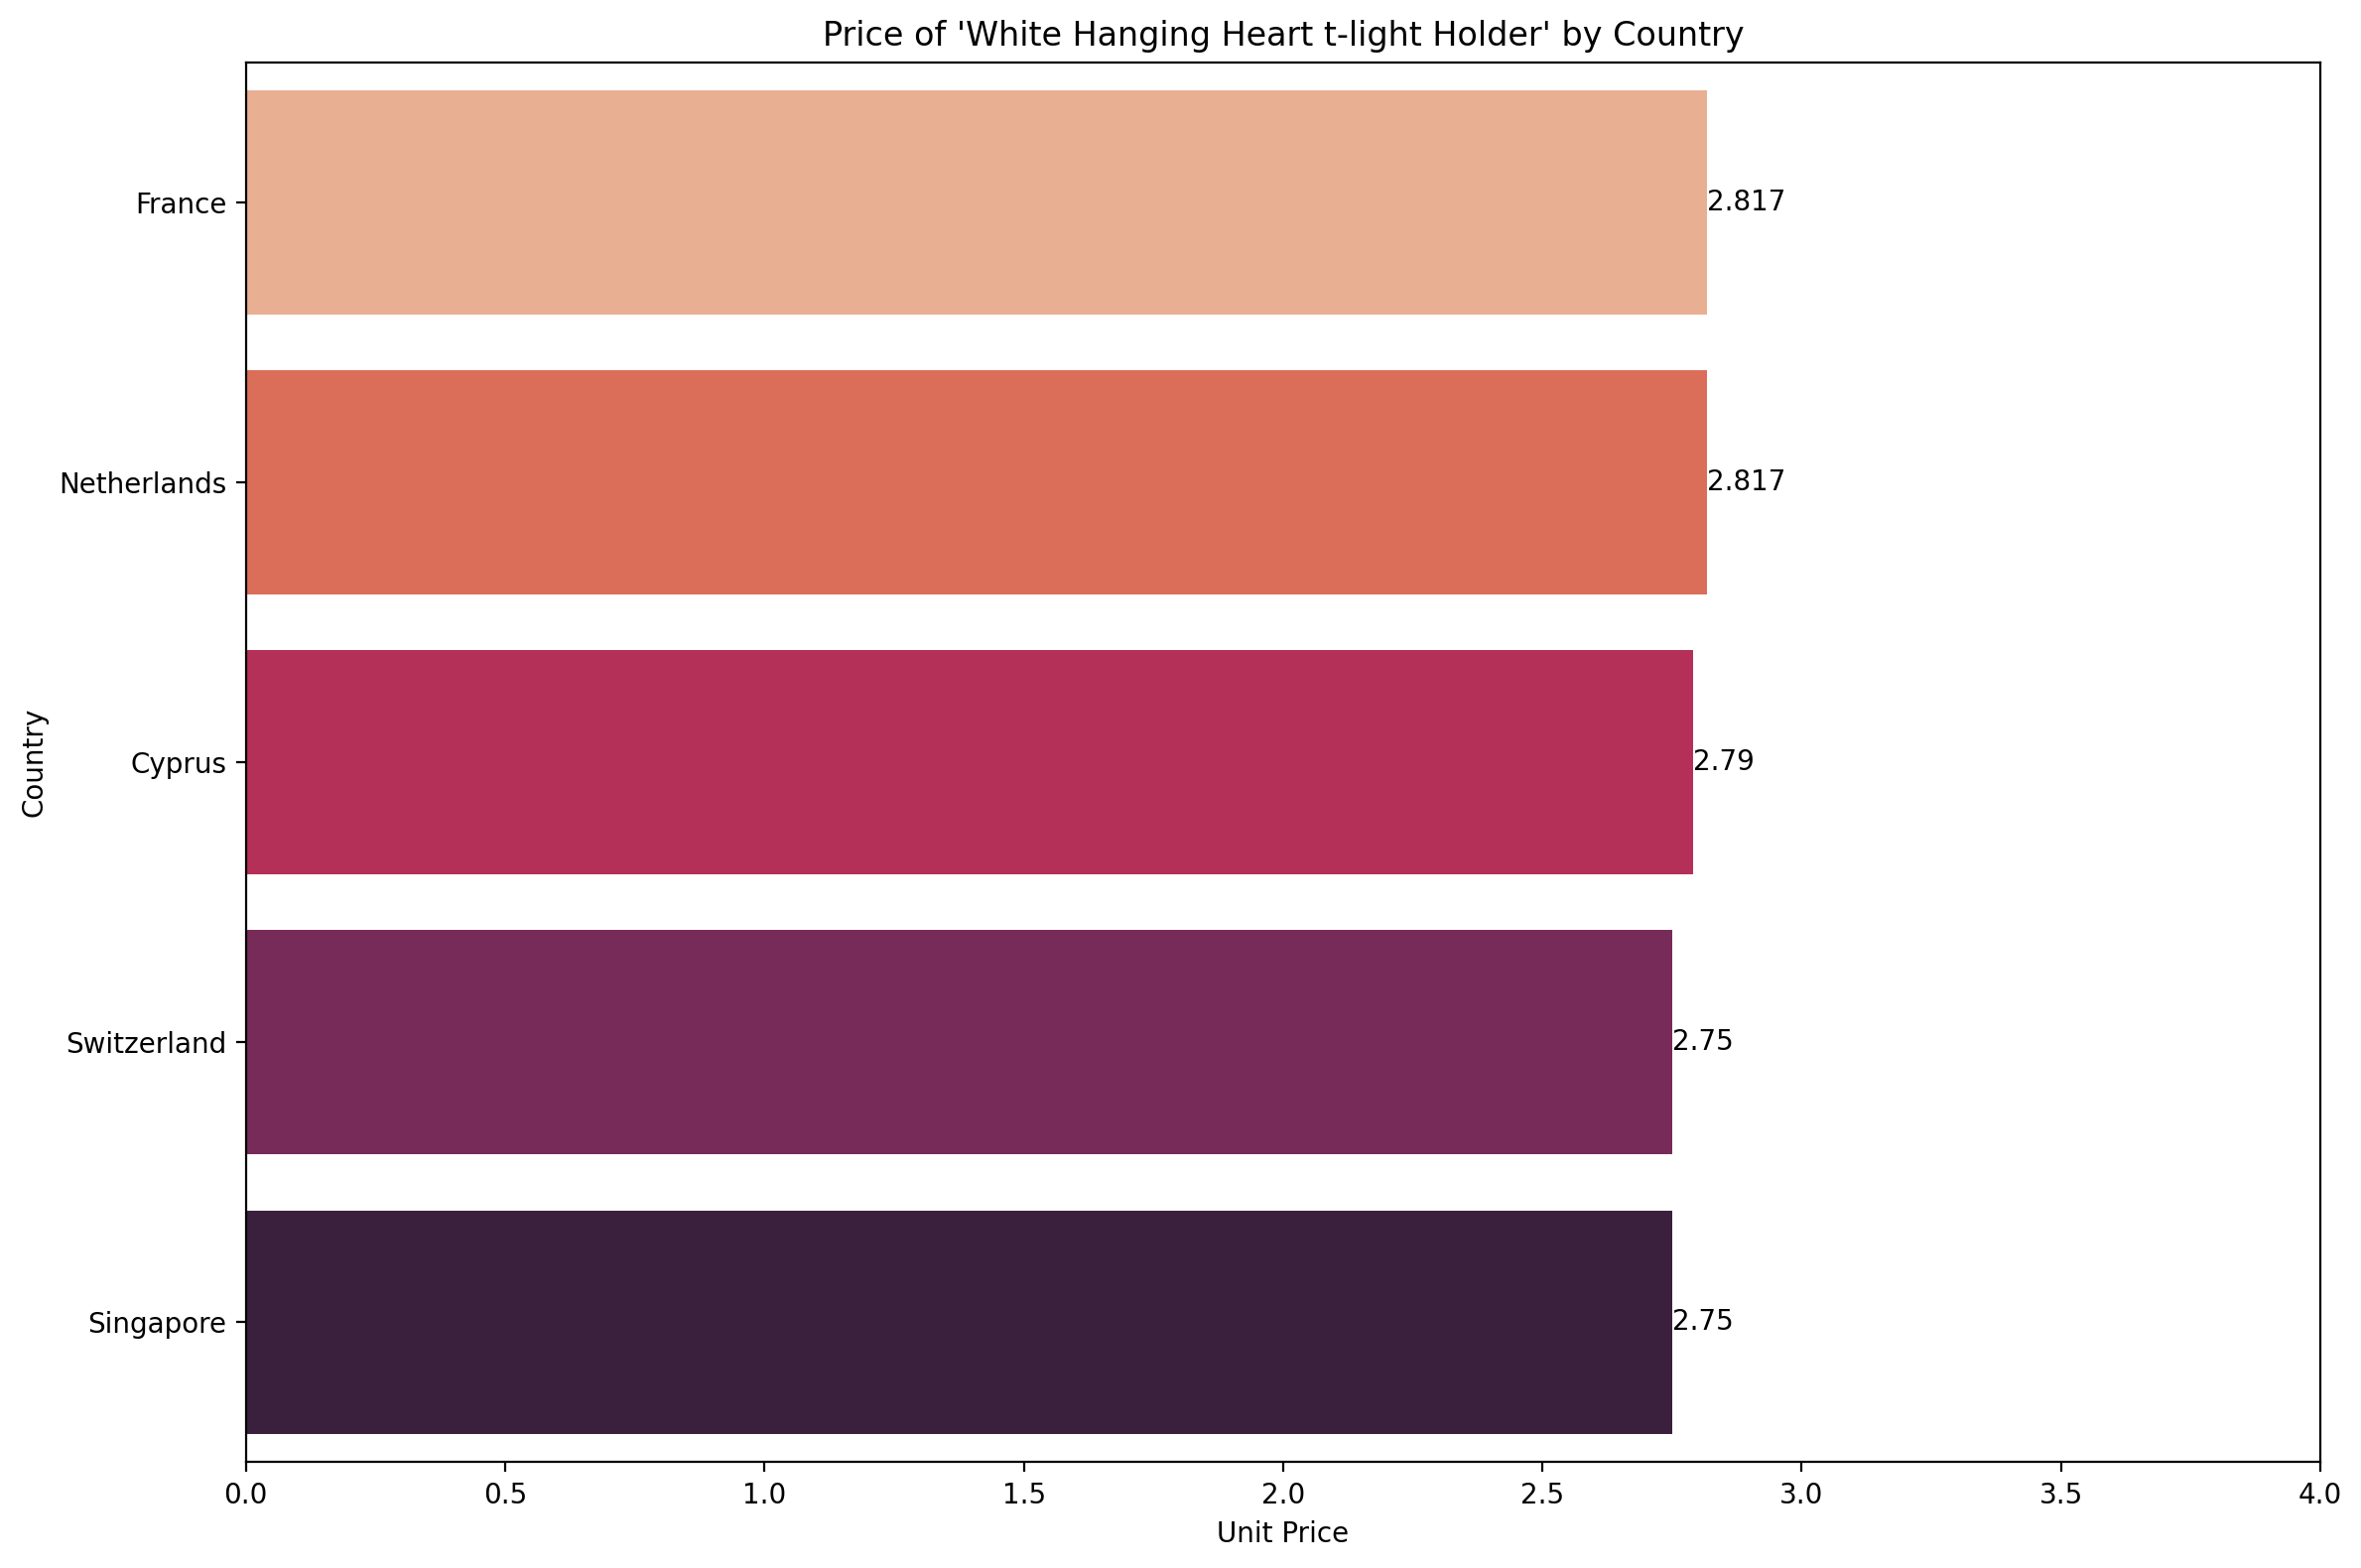

In [55]:
plt.figure(dpi= 200 ,figsize=(12, 8))

ax = sns.barplot(data=df_price,y=df_price.index,x="Country",palette="rocket_r")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Price of 'White Hanging Heart t-light Holder' by Country")
plt.xlim(0, 4)
plt.xlabel("Unit Price")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [56]:
# Total amount of the first 10 products

df["TOTAL_AMOUNT"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TOTAL_AMOUNT
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,12/1/2010 8:45,3.75,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,12/1/2010 8:45,3.75,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,12/1/2010 8:45,3.75,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,12/1/2010 8:45,0.85,France,10.2
4,536370,21883,STARS GIFT TAPE,24.0,12/1/2010 8:45,0.65,France,15.6


In [57]:
total_amount = df.groupby("Description")["TOTAL_AMOUNT"].sum().nlargest(10)
total_amount=total_amount.reset_index()

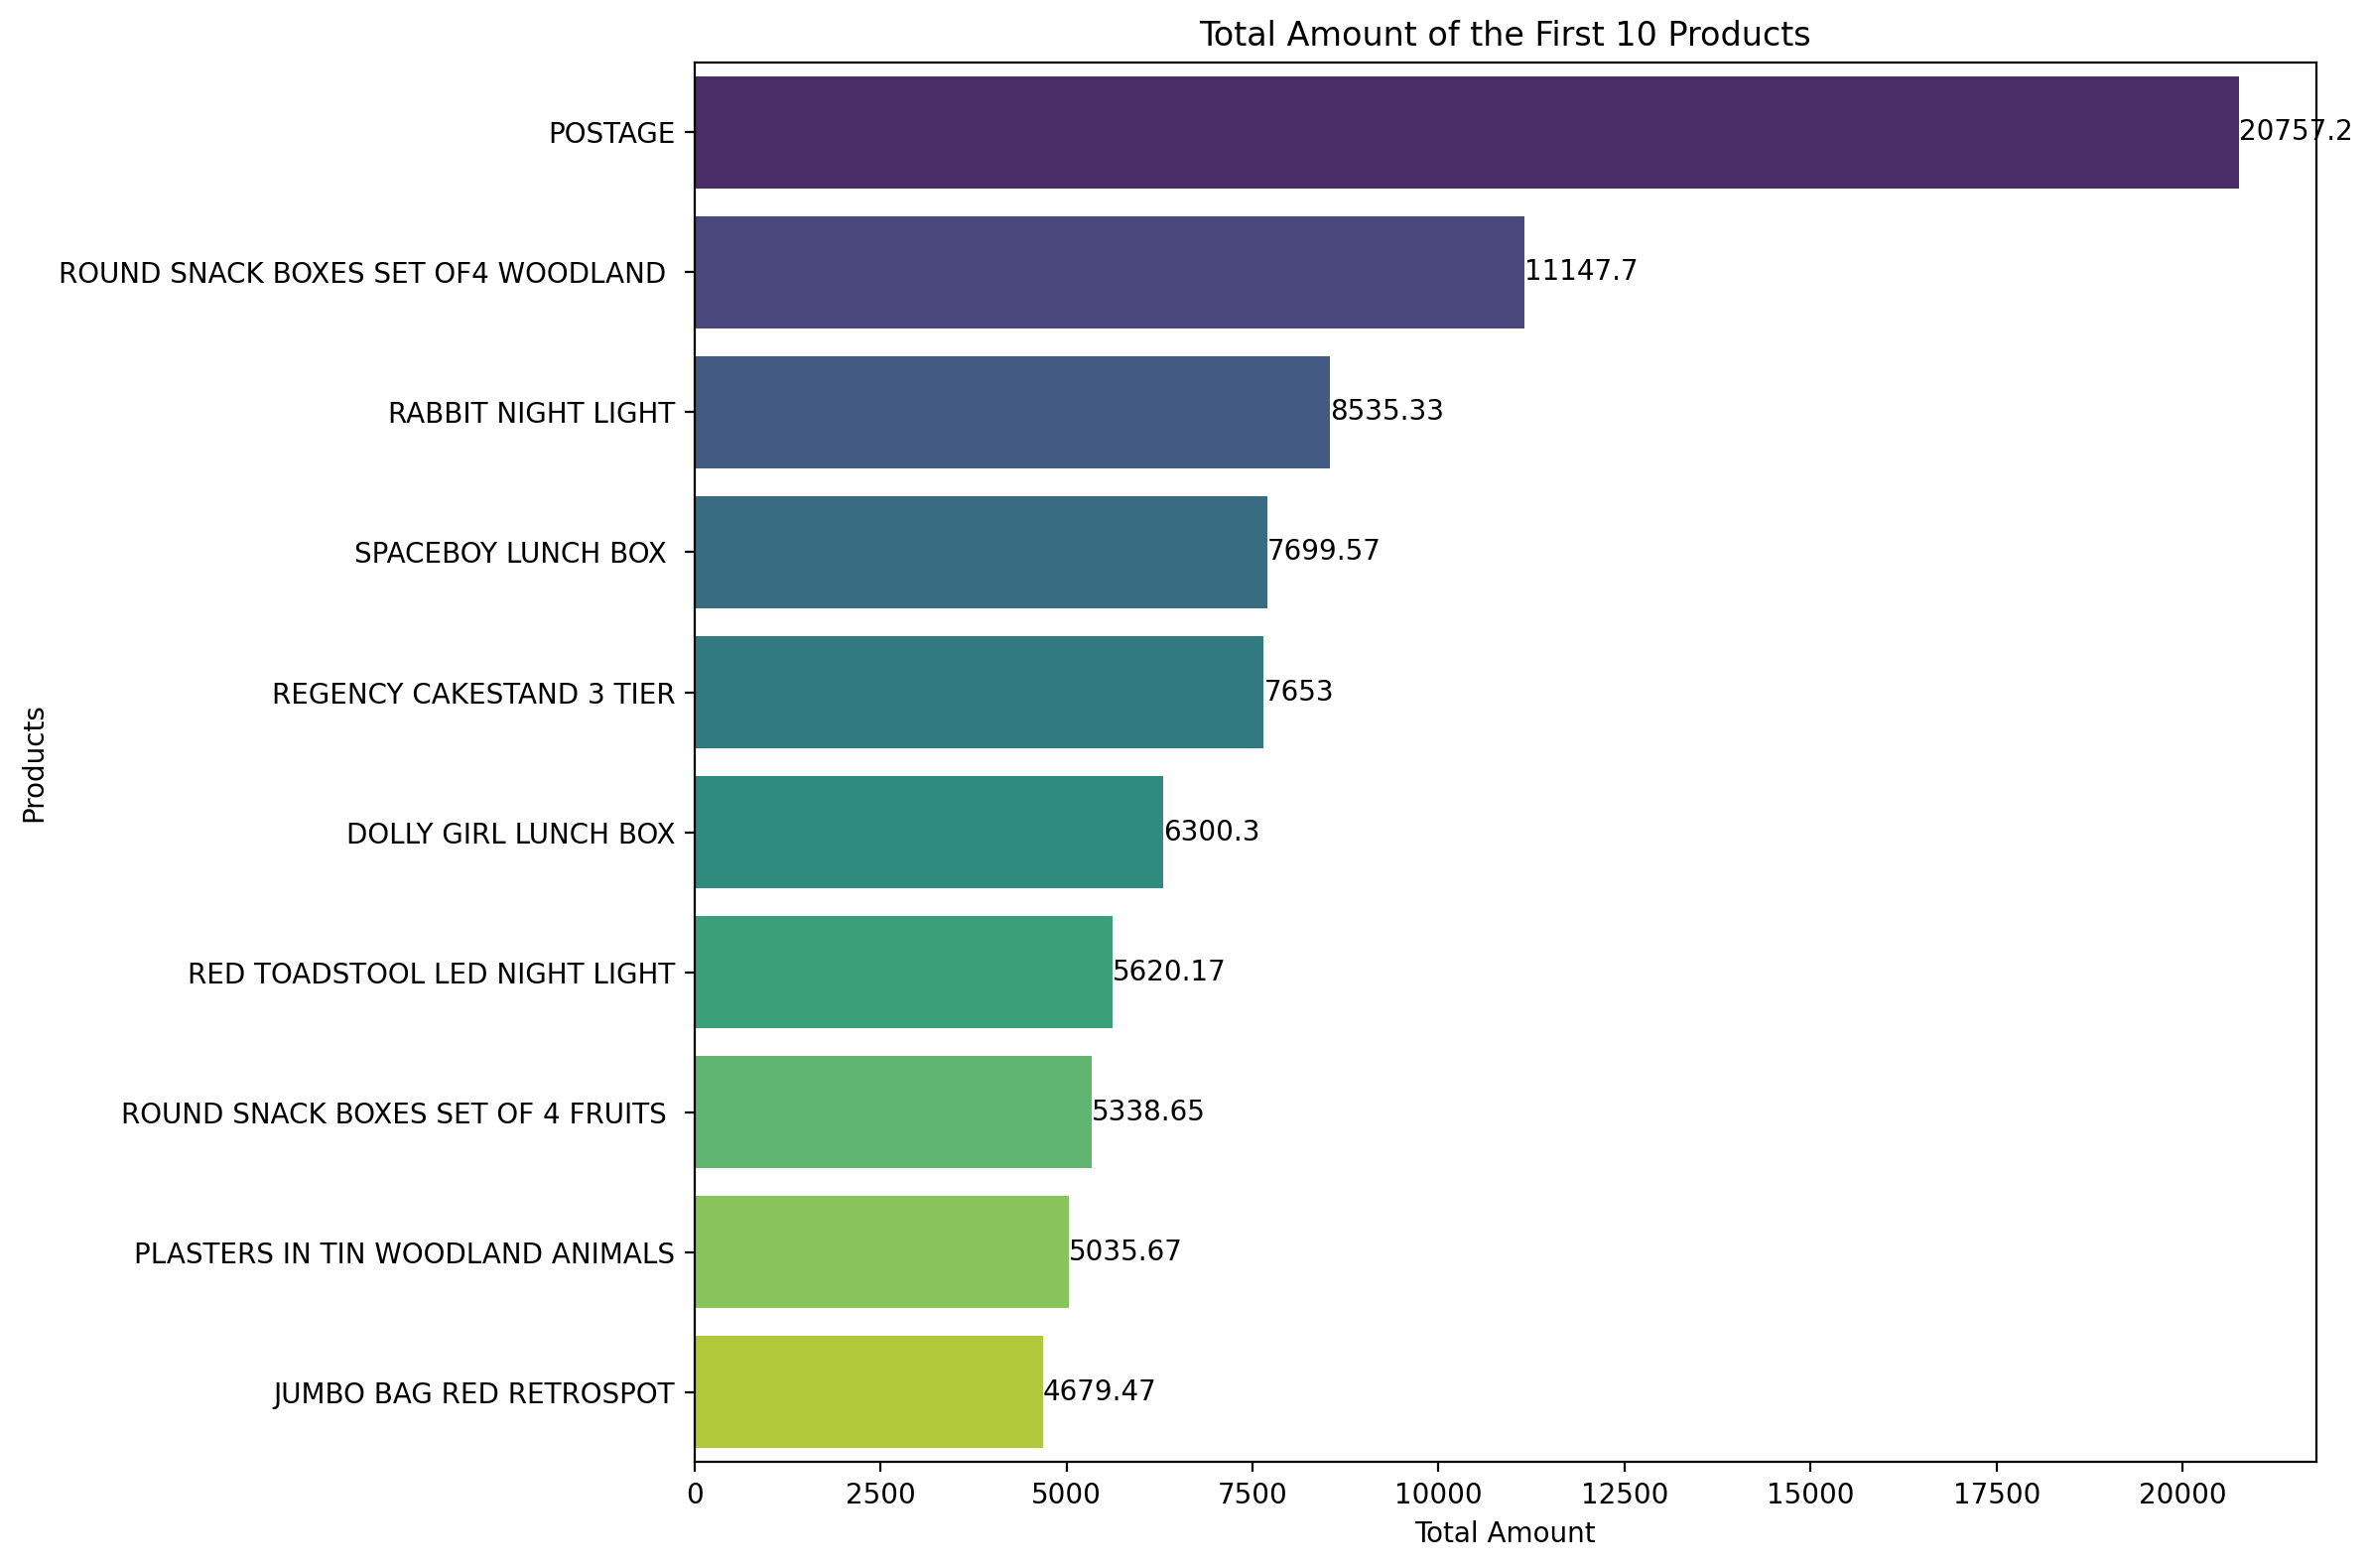

In [58]:
plt.figure(dpi= 200 ,figsize=(12, 8))

ax = sns.barplot(data=total_amount,y="Description",x="TOTAL_AMOUNT",palette="viridis")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Total Amount of the First 10 Products")
plt.xlabel("Total Amount")
plt.ylabel("Products")
plt.tight_layout()
plt.show()

### 3. Preparing the ARL Data Structure0.

### Invoice-Product Matrix
发票-产品矩阵
Setting it so that there are invoices in the rows and products in the columns. If there are products, 1, otherwise 0.设置它以便行中有发票，列有产品。如果有产品则为1，否则为0。

In [59]:
# Reaching the product quantities in each invoice.
df.groupby(["InvoiceNo","Description"])["Quantity"].sum().head(20)

# if you want you can use this code, it gives same result
# df.groupby(["INVOICE","DESCRIPTION"]).agg({"QUANTITY":"sum"}).head(20)

InvoiceNo  Description                        
536370      SET 2 TEA TOWELS I LOVE LONDON        24.0
           ALARM CLOCK BAKELIKE GREEN             12.0
           ALARM CLOCK BAKELIKE PINK              24.0
           ALARM CLOCK BAKELIKE RED               24.0
           CHARLOTTE BAG DOLLY GIRL DESIGN        20.0
           CIRCUS PARADE LUNCH BOX                24.0
           INFLATABLE POLITICAL GLOBE             48.0
           LUNCH BOX I LOVE LONDON                24.0
           MINI JIGSAW CIRCUS PARADE              24.0
           MINI JIGSAW SPACEBOY                   24.0
           MINI PAINT SET VINTAGE                 36.0
           PANDA AND BUNNIES STICKER SHEET        12.0
           POSTAGE                                 3.0
           RED TOADSTOOL LED NIGHT LIGHT          24.0
           ROUND SNACK BOXES SET OF4 WOODLAND     24.0
           SET/2 RED RETROSPOT TEA TOWELS         18.0
           SPACEBOY LUNCH BOX                     24.0
           STARS G

In [60]:
# Sorting descriptions by columns ;按列对描述进行排序
df.groupby(["InvoiceNo", "Description"]).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
InvoiceNo                                                       
536370                                 NaN                NaN   
536403                                 NaN                NaN   
536852                                 NaN                NaN   
536858                                 NaN                NaN   
536974                                 NaN                NaN   

                                                                       \
Description  I LOVE LONDON MINI BACKPACK  I LOVE LONDON MINI RUCKSACK   
InvoiceNo                                                               
536370                               NaN                          NaN   
536403                               NaN                          NaN   
536852                               NaN                          NaN   
536858                               NaN                          NaN   
536974                               NaN                          NaN   

                                      
Description  NINE DRAWER OFFICE TIDY  
InvoiceNo                             
536370                           NaN  
536403                           NaN  
536852                           NaN  
536858                           NaN  
536974                           NaN

In [61]:
# Filling nan values with zero ;用零填充 nan 值
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
InvoiceNo                                                       
536370                                 0.0                0.0   
536403                                 0.0                0.0   
536852                                 0.0                0.0   
536858                                 0.0                0.0   
536974                                 0.0                0.0   

                                                                       \
Description  I LOVE LONDON MINI BACKPACK  I LOVE LONDON MINI RUCKSACK   
InvoiceNo                                                               
536370                               0.0                          0.0   
536403                               0.0                          0.0   
536852                               0.0                          0.0   
536858                               0.0                          0.0   
536974                               0.0                          0.0   

                                      
Description  NINE DRAWER OFFICE TIDY  
InvoiceNo                             
536370                           0.0  
536403                           0.0  
536852                           0.0  
536858                           0.0  
536974                           0.0

In [62]:
# 0,0 is converted to 0, if there is a value then it is 1 ;0,0转为0，有值则为1
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
InvoiceNo                                                       
536370                                   0                  0   
536403                                   0                  0   
536852                                   0                  0   
536858                                   0                  0   
536974                                   0                  0   

                                                                       \
Description  I LOVE LONDON MINI BACKPACK  I LOVE LONDON MINI RUCKSACK   
InvoiceNo                                                               
536370                                 0                            0   
536403                                 0                            0   
536852                                 0                            0   
536858                                 0                            0   
536974                                 0                            0   

                                      
Description  NINE DRAWER OFFICE TIDY  
InvoiceNo                             
536370                             0  
536403                             0  
536852                             0  
536858                             0  
536974                             0

In [63]:
# Changing product names with stock code ;更改产品名称及股票代码
df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                        
StockCode    10002 10120 10125 10133 10135
InvoiceNo                                 
536370           1     0     0     0     0
536403           0     0     0     0     0
536852           0     0     0     0     0
536858           0     0     0     0     0
536974           0     0     0     0     0

In [64]:
# It ready !!
df_arl = df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [65]:
# Finding product name from stock code
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    print(product_name)
prdct_name_finder(df,"85014A")

['BLACK/BLUE POLKADOT UMBRELLA']


##### it works

### 4. Association Rule Analysis关联规则分析

What is Association Rule?什么是关联规则？

Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction. A typical example is a Market Based Analysis. 关联规则挖掘发现大量数据项之间有趣的关联和关系。此规则显示项目集在事务中出现的频率。一个典型的例子是基于市场的分析。

# apriori：表示使用 Apriori 算法来发现频繁项集。
df_arl：表示要分析的交易数据集，通常为 pandas DataFrame 格式。
min_support：表示最小支持度，是一个浮点数，用于控制频繁项集的最小出现频率。例如，如果 min_support 设置为 0.01，则表示频繁项集必须至少出现在 1% 的交易记录中。
use_colnames：表示是否使用列名来表示项集中的项。如果设置为 True，则会使用列名，否则会使用索引。

In [66]:
frequent_itemsets = apriori(df_arl,min_support=0.01,use_colnames=True)

C:\Users\LWY520\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [67]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
625,0.648696,"((Quantity, POST))"
210,0.182609,"((Quantity, 22326))"
278,0.165217,"((Quantity, 22554))"
122,0.161739,"((Quantity, 21731))"
280,0.154783,"((Quantity, 22556))"
...,...,...
11316,0.010435,"((Quantity, POST), (Quantity, 23052), (Quantit..."
11317,0.010435,"((Quantity, POST), (Quantity, 23054), (Quantit..."
11318,0.010435,"((Quantity, POST), (Quantity, 22423), (Quantit..."
11319,0.010435,"((Quantity, 23170), (Quantity, 22423), (Quanti..."


# association_rules：表示使用关联规则学习算法来生成关联规则。
frequent_itemsets：表示包含频繁项集的 pandas DataFrame。
metric：表示用于评估关联规则的指标，可以是 support、confidence、lift、leverage、conviction 或 zhangs_metric。默认值为 support。
min_threshold：表示最小阈值，用于控制关联规则的最小强度。例如，如果 min_threshold 设置为 0.01，则表示关联规则的支持度或置信度必须至少为 0.01。

In [68]:
rules = association_rules(frequent_itemsets,metric="support",min_threshold=0.01)

antecedent：表示关联规则的前件。
consequent：表示关联规则的后件。
support：表示关联规则的支持度。
confidence：表示关联规则的置信度。
lift：表示关联规则的提升度。
leverage：表示关联规则的杠杆度。
conviction：表示关联规则的信念度。
zhangs_metric：表示张氏度量。

In [69]:
# Filtering
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1746,"((Quantity, 21086))","((Quantity, 21080))",0.104348,0.109565,0.074783,0.716667,6.541005,0.063350,3.142711,0.945812
1747,"((Quantity, 21080))","((Quantity, 21086))",0.109565,0.104348,0.074783,0.682540,6.541005,0.063350,2.821304,0.951354
1748,"((Quantity, 21080))","((Quantity, 21094))",0.109565,0.100870,0.078261,0.714286,7.081281,0.067209,3.146957,0.964453
1749,"((Quantity, 21094))","((Quantity, 21080))",0.100870,0.109565,0.078261,0.775862,7.081281,0.067209,3.972709,0.955126
1912,"((Quantity, 21086))","((Quantity, 21094))",0.104348,0.100870,0.092174,0.883333,8.757184,0.081648,7.706832,0.989009
1913,"((Quantity, 21094))","((Quantity, 21086))",0.100870,0.104348,0.092174,0.913793,8.757184,0.081648,10.389565,0.985183
7034,"((Quantity, 22630))","((Quantity, 22629))",0.113043,0.144348,0.086957,0.769231,5.329008,0.070639,3.707826,0.915882
7035,"((Quantity, 22629))","((Quantity, 22630))",0.144348,0.113043,0.086957,0.602410,5.329008,0.070639,2.230830,0.949390
7658,"((Quantity, 22726))","((Quantity, 22727))",0.076522,0.074783,0.060870,0.795455,10.636892,0.055147,4.523285,0.981060
7659,"((Quantity, 22727))","((Quantity, 22726))",0.074783,0.076522,0.060870,0.813953,10.636892,0.055147,4.963696,0.979216


In [70]:
# Filtering by confidence
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23614,"((Quantity, 21086), (Quantity, 21080))","((Quantity, 21094))",0.074783,0.100870,0.073043,0.976744,9.683240,0.065500,38.662609,0.969209
87888,"((Quantity, 21086), (Quantity, 21080), (Quanti...","((Quantity, 21094))",0.057391,0.100870,0.055652,0.969697,9.613375,0.049863,29.671304,0.950530
87891,"((Quantity, POST), (Quantity, 21080), (Quantit...","((Quantity, 21086))",0.059130,0.104348,0.055652,0.941176,9.019608,0.049482,15.226087,0.945009
23616,"((Quantity, 21080), (Quantity, 21094))","((Quantity, 21086))",0.078261,0.104348,0.073043,0.933333,8.944444,0.064877,13.434783,0.963612
25332,"((Quantity, POST), (Quantity, 21094))","((Quantity, 21086))",0.074783,0.104348,0.069565,0.930233,8.914729,0.061762,12.837681,0.959586
1913,"((Quantity, 21094))","((Quantity, 21086))",0.100870,0.104348,0.092174,0.913793,8.757184,0.081648,10.389565,0.985183
8605,"((Quantity, 23254))","((Quantity, 23256))",0.074783,0.083478,0.066087,0.883721,10.586240,0.059844,7.882087,0.978730
1912,"((Quantity, 21086))","((Quantity, 21094))",0.104348,0.100870,0.092174,0.883333,8.757184,0.081648,7.706832,0.989009
52734,"((Quantity, 22728), (Quantity, 22727))","((Quantity, 22726))",0.057391,0.076522,0.050435,0.878788,11.484160,0.046043,7.618696,0.968507
52732,"((Quantity, 22726), (Quantity, 22728))","((Quantity, 22727))",0.059130,0.074783,0.050435,0.852941,11.405609,0.046013,6.291478,0.969660


### 5. Application


For example, a member purchased a product with stock code 85123A ...例如，会员购买了股票代码85123A的产品...

In [71]:
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    return product_name

In [72]:
def arl_recommender(rules_df, product_id, rec_count):
    
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    recommendation_list_name = []
    
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j[1] == product_id:
                for k in list(sorted_rules.iloc[i]["consequents"]):
                    if k[1] not in recommendation_list:
                        recommendation_list.append(k[1])
    added_product = prdct_name_finder(df,product_id)
    print(f"已添加到购物车:           {added_product[0]}\n\n") ##已添加到购物车
    print(f"购买过此商品的会员还购买了:\n\n")     ##购买过此商品的会员还购买了
    for i in range(0,rec_count):
        recommendation_list_name.append(prdct_name_finder(df,recommendation_list[i]))
        print(f"                         {recommendation_list_name[i][0]}\n")

In [73]:
arl_recommender(rules, "84997C", 3)

已添加到购物车:           BLUE 3 PIECE POLKADOT CUTLERY SET


购买过此商品的会员还购买了:


                         RED 3 PIECE RETROSPOT CUTLERY SET

                         GREEN 3 PIECE POLKADOT CUTLERY SET

                         POSTAGE



In [74]:
arl_recommender(rules, "15056BL", 9)

已添加到购物车:           EDWARDIAN PARASOL BLACK


购买过此商品的会员还购买了:


                         EDWARDIAN PARASOL RED

                         POSTAGE

                         RED RETROSPOT UMBRELLA

                         EDWARDIAN PARASOL NATURAL

                         LUNCH BAG RED RETROSPOT

                         LUNCH BAG APPLE DESIGN

                         LUNCH BOX WITH CUTLERY RETROSPOT 

                         TEA PARTY BIRTHDAY CARD

                         RABBIT NIGHT LIGHT



# 系统展示

In [75]:
from mlxtend.frequent_patterns import apriori, association_rules
import tkinter as tk
from tkinter import ttk, scrolledtext

In [76]:
df = pd.read_csv(r"data.csv", encoding='latin1')

df.drop(columns=['CustomerID'], axis=1, inplace=True)
df.dropna(subset='Description',axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
inv = df["InvoiceNo"].str.contains("C",na=False).sum()

def cancelledInvoice(x):##把存有字符C的数据删除
    if ('C' in str(x)):
        return np.nan
    else:
        return x
df['InvoiceNo'] = df['InvoiceNo'].apply(lambda x: cancelledInvoice(x))
df.dropna(subset='InvoiceNo', axis=0, inplace=True)##剔除交易取消的单子
def cleanInvoice (x):
    if(str(x).isdigit()!=True or len(str(x)) !=6):
        return np.nan
    else:
        return x
df['InvoiceNo']=df['InvoiceNo'].apply(lambda x: cleanInvoice(x))##订单号不是6为数字的单子去除
df.dropna(subset='InvoiceNo',axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df["InvoiceNo"] = df["InvoiceNo"].astype('int64').astype(str)
##统计错误商品数量的单子
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()

##统计错误商品单价的单子
up=df.loc[df["UnitPrice"]<0,"UnitPrice"].count()
df=df[(df['Quantity'] > 0)]
df.reset_index(drop=True, inplace=True)
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()

df['Country'].unique()
def handling_outlier(df,variable):
    quartile1 = df[variable].quantile(0.01)
    quartile3 = df[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    df.loc[df[variable] < low_limit, variable] = low_limit
    df.loc[df[variable] > up_limit, variable] = up_limit
handling_outlier(df,"Quantity")
handling_outlier(df,"UnitPrice")
df.reset_index(drop=True, inplace=True)
list_cntry = ["Greece","Singapore","Netherlands","Switzerland","Cyprus","France","Korea","Canada"]
for number,country in enumerate(list_cntry):
    list_cntry[number] = df[df['Country'] == country]
del df
df = pd.concat(list_cntry,axis=0)
df = df.sort_index()
df = df.reset_index(drop=True)
df.groupby(["InvoiceNo","Description"])["Quantity"].sum().head(20)
df.groupby(["InvoiceNo", "Description"]).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]
df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]
df_arl = df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
# Finding product name from stock code
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    print(product_name)
prdct_name_finder(df,"85014A")
frequent_itemsets = apriori(df_arl,min_support=0.01,use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False)
rules = association_rules(frequent_itemsets,metric="support",min_threshold=0.01)
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False)
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    return product_name


def arl_recommender(rules_df, product_id, rec_count):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    recommendation_list_name = []
    other_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j[1] == product_id:
                for k in list(sorted_rules.iloc[i]["consequents"]):
                    if k[1] not in recommendation_list:
                        recommendation_list.append(k[1])
    added_product = prdct_name_finder(df, product_id)
    print(f"已添加到购物车:           {added_product[0]}\n\n")  ##已添加到购物车
    print(f"购买过此商品的会员还购买了:\n\n")  ##购买过此商品的会员还购买了
    for i in range(0, rec_count):
        recommendation_list_name.append(prdct_name_finder(df, recommendation_list[i]))
        print(f"                         {recommendation_list_name[i][0]}\n")
        other_list.append(recommendation_list_name[i][0])
    return added_product[0],other_list

['BLACK/BLUE POLKADOT UMBRELLA']


C:\Users\LWY520\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:
class ARLRecommenderApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ARL Recommender System")
        self.root.geometry("500x400")

        # Label and Entry for Product ID
        self.label = ttk.Label(root, text="请输入商品ID:")
        self.label.pack(pady=5)
        self.entry = ttk.Entry(root, width=30)
        self.entry.pack(pady=5)

        # 推荐的数量

        self.label = ttk.Label(root, text="请输入推荐个数:")
        self.label.pack(pady=5)
        self.num = ttk.Entry(root, width=30)
        self.num.pack(pady=10)

        # Button to get recommendations
        self.button = ttk.Button(root, text="Get Recommendations", command=self.get_recommendations)
        self.button.pack(pady=10)

        # Text box to display results
        self.text_box = scrolledtext.ScrolledText(root, width=60, height=15)
        self.text_box.pack(pady=10)

    def get_recommendations(self):
        product_id = self.entry.get()
        rec_count = self.num.get()
        rec_count = int(rec_count)
        if product_id:
            added_product, recommendations = arl_recommender(rules, product_id, rec_count)
            self.text_box.delete('1.0', tk.END)
            if added_product:
                self.text_box.insert(tk.END, f"已添加到购物车的商品: {added_product}\n\n")
                if recommendations:
                    self.text_box.insert(tk.END, f"购买过此商品的用户还购买了:\n\n")
                    for rec in recommendations:
                        self.text_box.insert(tk.END, f"                         {rec}\n")
                else:
                    self.text_box.insert(tk.END, "No recommendations found for this product.\n")
            else:
                self.text_box.insert(tk.END, "Product ID not found in the dataset.")
        else:
            self.text_box.delete('1.0', tk.END)
            self.text_box.insert(tk.END, "Please enter a valid Product ID.")


if __name__ == "__main__":
    root = tk.Tk()
    app = ARLRecommenderApp(root)
    root.mainloop()